# Smooth Pulse

Let us implement a CZ gate on two atoms in the perfect Rydberg blockade regime, using smooth pulse ansatz functions for the phase and amplitude.

In [1]:
# %pip install -q --progress-bar off rydopt # Uncomment for installation on Colab

import rydopt as ro
import numpy as np

First, we create the target gate.

In [2]:
gate = ro.gates.TwoQubitGate(phi=None, theta=np.pi, Vnn=float("inf"), decay=0.0)

Then we choose a pulse ansatz that consists of a constant detuning, a sweep of the laser phase, and a smooth switching of the Rabi frequency amplitude. We provide initial guesses of pulse paramaters as input for the optimization. For the Rabi frequency amplitude, we fixe the pulse parameters so that it plateaus at $1\;\Omega_0$ and it is smooth enough to not have significant frequency contributions beyond $2\;\Omega_0$. 

In [9]:
pulse_ansatz = ro.pulses.PulseAnsatz(
    detuning_ansatz=ro.pulses.const,
    phase_ansatz=ro.pulses.sin_crab,
    rabi_ansatz=ro.pulses.softbox_nuttall,
)

initial_params = (7.0, [0.0], [0.0, 0.0], [1.0, 2.0])
fixed_initial_params = (False, [False], [False, False], [True, True])

Now, we perform the optimization and plot the result.


Started optimization using 1 process



proc00:   0%|                        | 0/1000 [00:00<?, ?it/s]


=== Optimization finished using Adam ===

Duration: 3.670 seconds
Gates with infidelity below tol=1.0e-07: 1

Optimized gate:
> infidelity <= tol
> parameters = (10.308612250565552, [0.0759698], [ 3.1878672  -0.82308034], [1. 2.])
> duration = 10.308612250565552


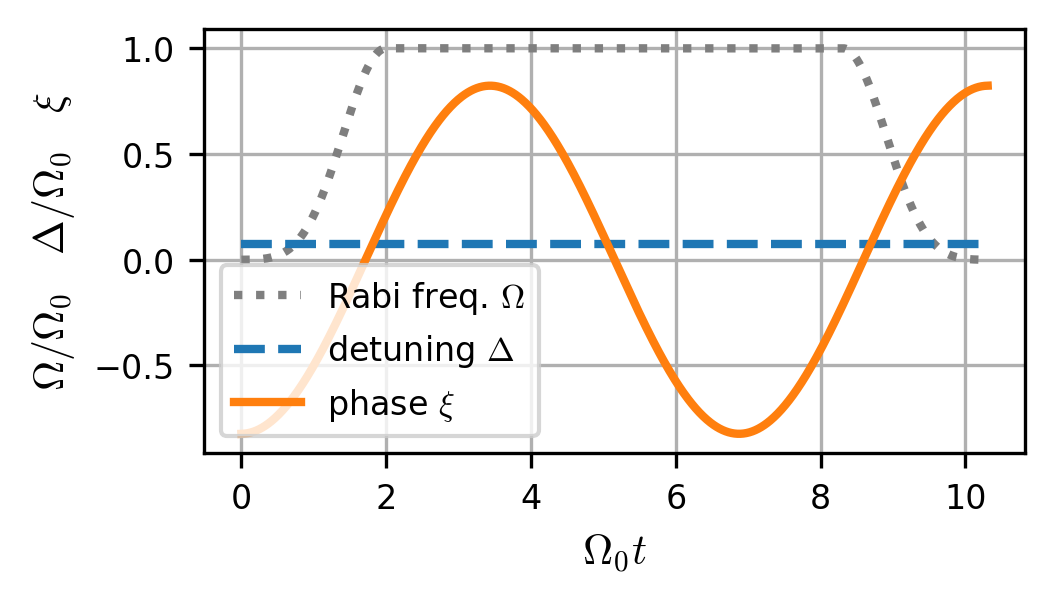

In [10]:
opt_result = ro.optimization.optimize(
    gate, pulse_ansatz, initial_params, fixed_initial_params
)
optimized_params = opt_result.params

ro.characterization.plot_pulse(pulse_ansatz, optimized_params)